#  Heart Disease Prediction Model
## By- Hardik Somkuwar
###     2021BCY0046
---



---




![](https://www.science.org/do/10.1126/science.aal1058/full/iStock-638581314_16x9-1644902880473.jpg)
Attribute Information:
------------------------
      -- 1.  Age       
      -- 2.  Sex:1 = male; 0 = female          
      -- 3.  cp:chest pain type  (4 values)       
      -- 4.  restbps: resting blood pressure  
      -- 5.  chol: serum cholestoral in mg/dl      
      -- 6.  fbs: fasting blood sugar > 120 mg/dl       
      -- 7.  restecg: resting electrocardiographic results  (values 0,1,2)
      -- 8.  thalach: maximum heart rate achieved  
      -- 9.  eexang: exercise induced angina    
      -- 10. oldpeak: ST depression induced by exercise relative to rest   
      -- 11. slope: the slope of the peak exercise ST segment     
      -- 12. ca: number of major vessels (0-3) colored by flourosopy        
      -- 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect   
      -- 14. num: target variable 1= Presence of disease and 0= Absence
      


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Libraries

In [4]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

%matplotlib inline

# Load and Explore the Dataset

In [5]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/heart.dat'

In [6]:
data = pd.read_csv(url,names=['Age','Sex','cp','restbps','chol','fbs','restecg','thalach','exang',
                              'oldpeak','slope','ca','thal','num'],sep=' ')

In [36]:
data

,Age,Sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,1
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,0
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,1
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,0
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,0
266,44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,0
267,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,0
268,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,0


In [7]:
# shape
data.shape

(270, 14)

We an see that the dataset contains **270** instances and **14** attributes

In [8]:
# Check the head of the data set to see the data types.
data.head()

,Age,Sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1



Here we can see that the data contains the following attribute types:

Attributes: **1, 4, 5, 8, 10, 12**

Ordered: **11**

Binary: **2, 6, 9**

Nominal: **7, 3, 13**

The target attribute, num indicates the absence (1) or presence (2) of heart disease. At first glance we can also see that the raw data is comprised of attributes with varying magnitudes. Therefore, the attributes will be normalized to ensure that the best classifier performance is obtained.

In [37]:
# Checking the data to ensure that the attributes are correct type and check if they are null.
print(data.info())
print("-------------------------------")
print(data.describe())
print("-------------------------------")
print(f"Count of NaN values in dataset:{data.isna().sum().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      270 non-null    float64
 1   Sex      270 non-null    float64
 2   cp       270 non-null    float64
 3   restbps  270 non-null    float64
 4   chol     270 non-null    float64
 5   fbs      270 non-null    float64
 6   restecg  270 non-null    float64
 7   thalach  270 non-null    float64
 8   exang    270 non-null    float64
 9   oldpeak  270 non-null    float64
 10  slope    270 non-null    float64
 11  ca       270 non-null    float64
 12  thal     270 non-null    float64
 13  num      270 non-null    uint8  
dtypes: float64(13), uint8(1)
memory usage: 27.8 KB
None
-------------------------------
              Age         Sex          cp     restbps        chol         fbs  \
count  270.000000  270.000000  270.000000  270.000000  270.000000  270.000000   
mean    54.433333    0.677778    3.1

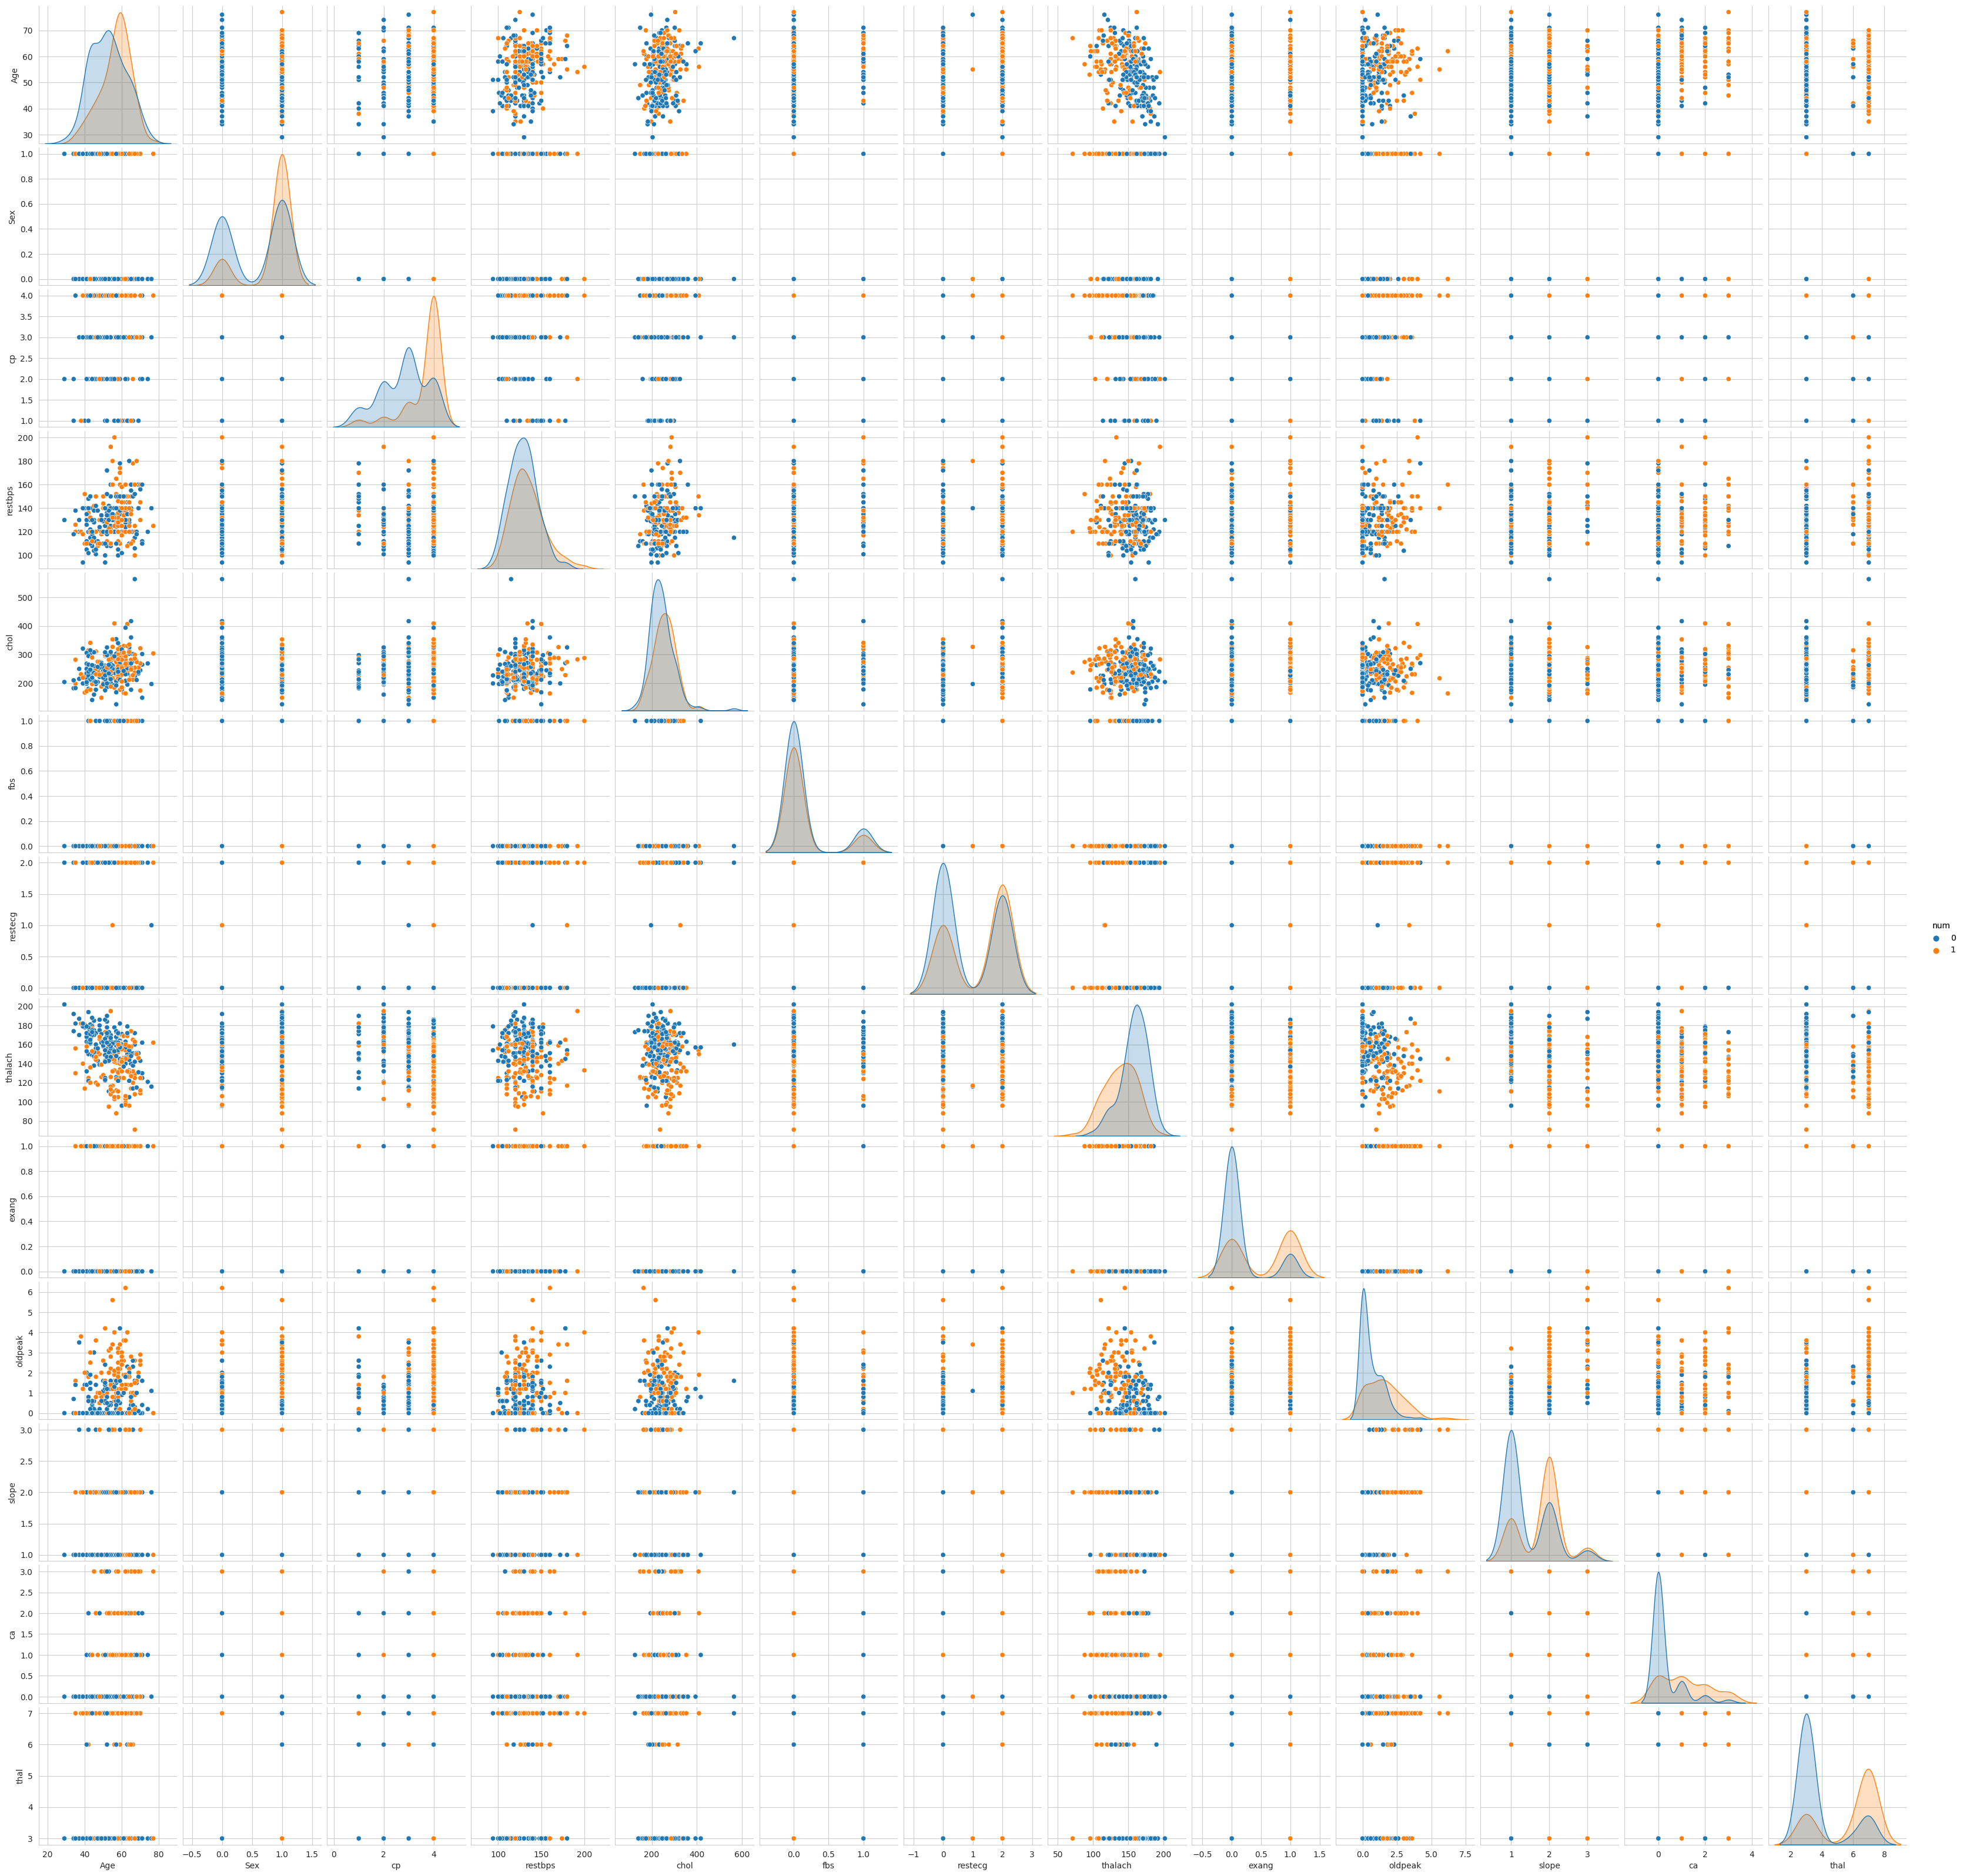

In [39]:
# Visualise data for better understanding
pairplot = sns.pairplot(data, hue ='num')
pairplot.add_legend()
plt.show()

<Axes: >

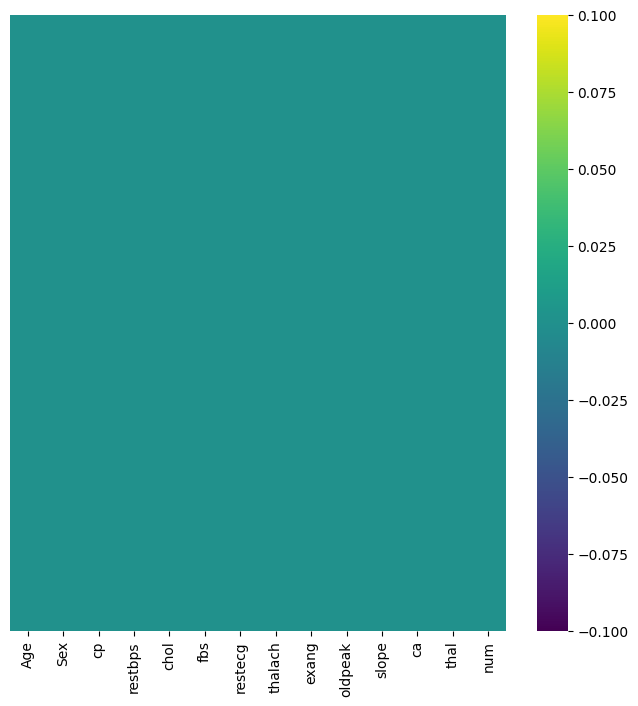

In [11]:
# Checking for missing Data

plt.figure(figsize=(8,8))
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis')

The uniformity of the above heatmap indicates that there are no missing data. Therefore, we can proceed to preparing and exploring the data.

#EDA - Exploratory data analysis:

**Checking Outliers:**

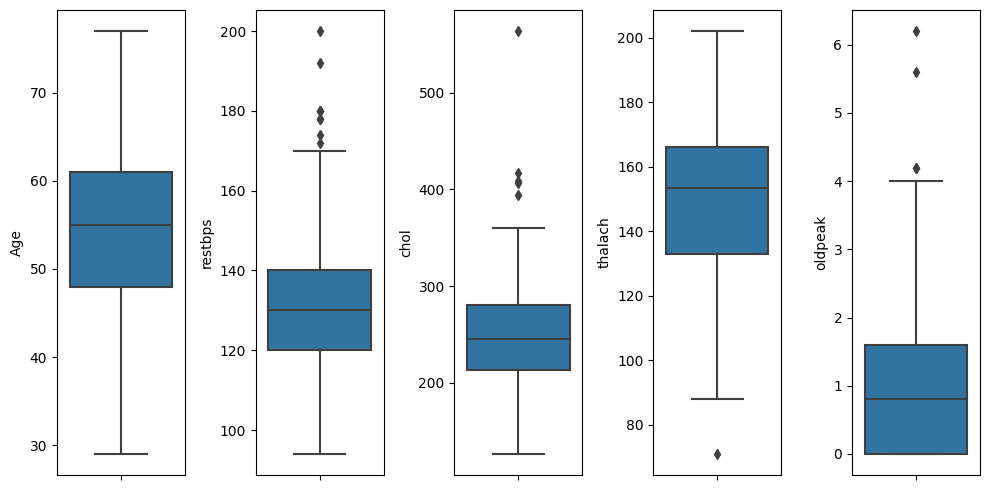

In [12]:
col_num = ['Age', 'restbps', 'chol', 'thalach', 'oldpeak']
plt.figure(figsize=(10,5))
for i in range(0,len(col_num)):
    plt.subplot(1,len(col_num),i+1)
    sns.boxplot(y=data[col_num[i]])
    plt.tight_layout()

    ha_df = data

In [13]:
#Removing the outliers using IQR Method

for i in col_num:
    Q1 = ha_df[i].quantile(0.25)
    Q3 = ha_df[i].quantile(0.75)
    IQR = Q3-Q1
    LowerBound = Q1 - (1.5 * IQR)
    UpperBound = Q3 + (1.5 * IQR)

    ha_df = ha_df[(ha_df[i] >= LowerBound)&(ha_df[i] <= UpperBound)]

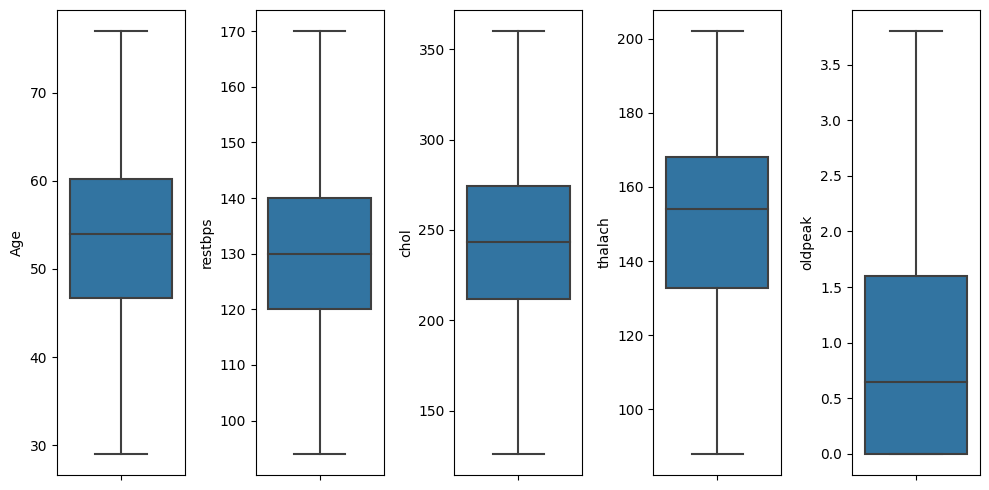

In [14]:

plt.figure(figsize=(10,5))
for i in range(0,len(col_num)):
    plt.subplot(1,len(col_num),i+1)
    sns.boxplot(y = ha_df[col_num[i]])
    plt.tight_layout()

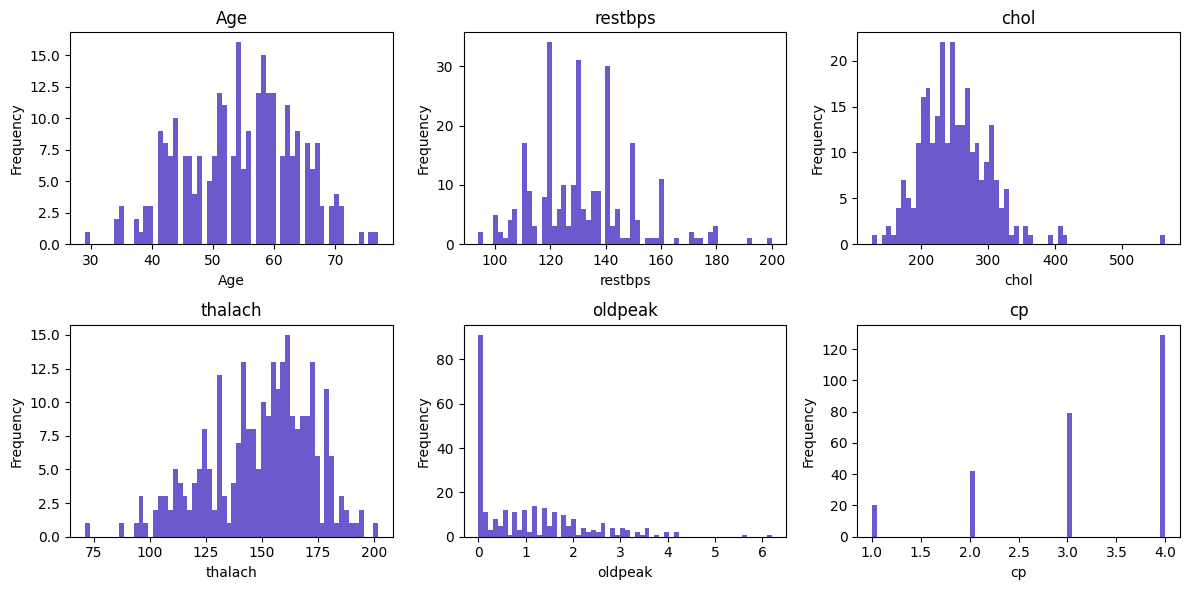

In [15]:
# Ploting Histogram

attributes = ['Age', 'restbps', 'chol', 'thalach', 'oldpeak', 'cp']

# Create subplots with two rows and three columns
fig, axes = plt.subplots(2, 3, figsize=(12, 6))

for i, attribute in enumerate(attributes):
    # Plot the histogram for the current attribute in the corresponding subplot
    row = i // 3  # Determine the row
    col = i % 3   # Determine the column
    axes[row, col].hist(data[attribute], bins=60, color='slateblue')
    axes[row, col].set_title(attribute)

    # Add x-axis and y-axis labels
    axes[row, col].set_xlabel(attribute)  # X-axis label
    axes[row, col].set_ylabel('Frequency')  # Y-axis label

# Adjust the layout to avoid overlapping titles
plt.tight_layout()

# Display the subplots
plt.show()

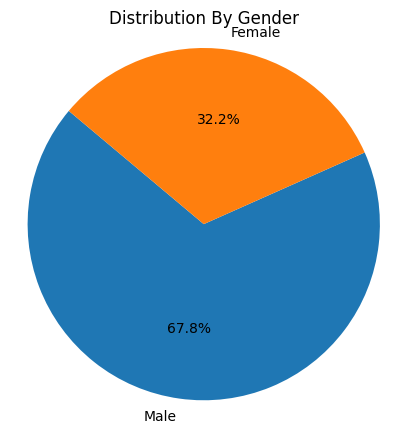

In [16]:
import matplotlib.pyplot as plt

# Assuming you have a Pandas DataFrame named 'data' with a 'Sex' column
# Replace 'data' with your actual DataFrame

# Extract the counts of unique values in the 'Sex' attribute
num_counts = data['Sex'].value_counts()

# Replace 0 with "female" and 1 with "male"
labels = ['Female' if label == 0 else 'Male' for label in num_counts.index]

# Create a pie chart
plt.figure(figsize=(5, 5))  # Set the figure size
plt.pie(num_counts, labels=labels, autopct='%1.1f%%', startangle=140)

# Set the title
plt.title('Distribution By Gender')

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle
plt.show()

In [17]:
#counting number of males and females in the dataset

df = pd.DataFrame(data)
count = df['Sex'].sum()

print(f'Number of Males in the dataset: {count}')

print(f'Number of Females in the dataset: {270-count}')

Number of Males in the dataset: 183.0
Number of Females in the dataset: 87.0


In [18]:
# converting target variable num to 0 as(absence) and 1 as(presence) of heart disease.

num = pd.get_dummies(data['num'],drop_first=True)

In [19]:
data = pd.concat([data,num],axis=1)
data.drop('num',axis=1,inplace=True)

In [20]:
data.head()

,Age,Sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,2
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,1
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,0
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,1
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,0
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,0


In [21]:
# Rename target column num from 2

data.rename(columns= {2:'num'},inplace=True)

In [22]:
# Check the head of the dataframe to ensure the change occured.

data.head()


,Age,Sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,1
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,0
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,1
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,0
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,0


#Class Distribution

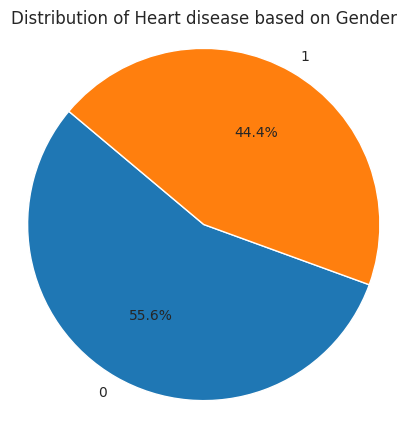

In [43]:
import matplotlib.pyplot as plt

# Assuming you have a Pandas DataFrame named 'data' with a 'num' column
# Replace 'data' with your actual DataFrame

# Extract the counts of unique values in the 'num' attribute
num_counts = data['num'].value_counts()

# Extract the unique values as labels
labels = num_counts.index

# Create a pie chart
plt.figure(figsize=(5, 5))  # Set the figure size
plt.pie(num_counts, labels=labels, autopct='%1.1f%%', startangle=140)

# Set the title
plt.title('Distribution of Heart disease based on Gender')

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle
plt.show()

In [24]:
# How many cases of heart disease does the data set contain
data.groupby('num').size()

num
0    150
1    120
dtype: int64

# Data Visualization

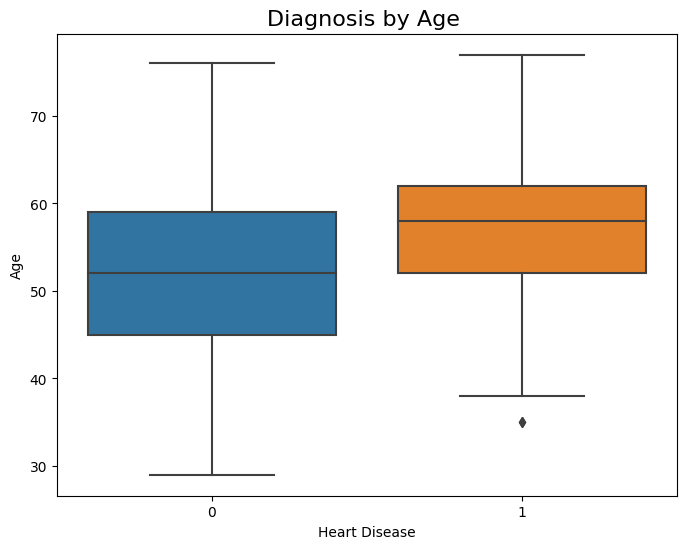

In [25]:
# Box plot of
_= plt.figure(figsize=(8,6))
_= sns.boxplot(x='num',y='Age',data=data)
_= plt.xlabel('Heart Disease')
_= plt.title("Diagnosis by Age ",fontsize=16)


-The dataset contains **150** instances of individuals without heart disease and 120 instances of patients with heart disease.

-Studies have shown that men are more likely to be at risk for a heart attack much earlier in life than women. This is due to the premenopausal protection provided by estrogen. However, after menopause, estrogen levels significantly decrease.

-These findings explain why the risk of a heart attack is **70%** in women, but **66%** in men. With this information, it would be valuable to explore the data to confirm the existence of these trends.

Text(0.5, 1.0, 'Number of Heart Disease Cases by Gender')

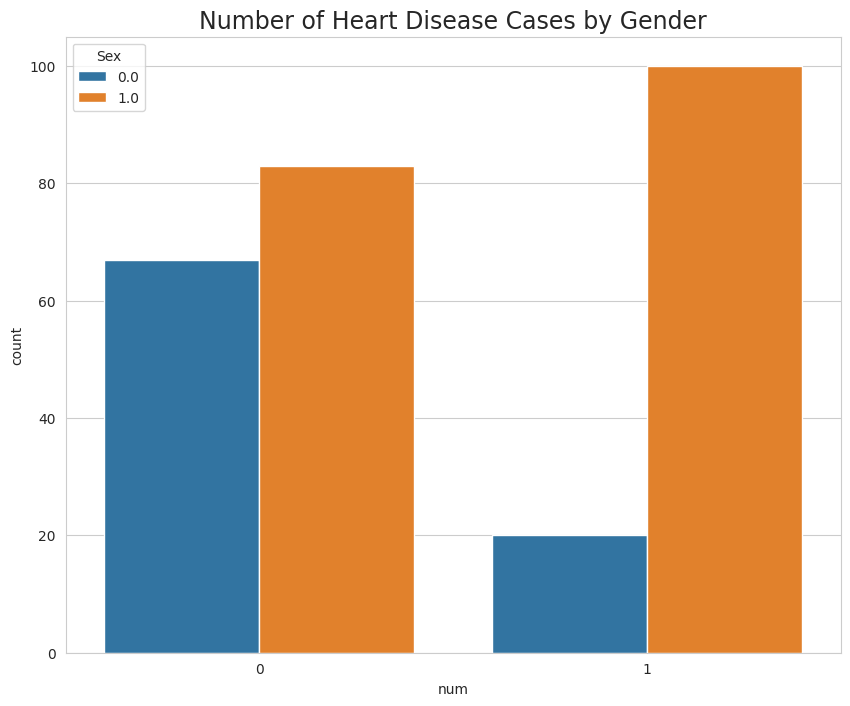

In [26]:
# Visualize the number of disease in each gender by cases: (male = 1 and female = 0)

sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.countplot(x='num', data=data, hue='Sex')
plt.title('Number of Heart Disease Cases by Gender', fontsize=17)


So far we can see that men had higher instances of heart disease compared to females.

Now, what is the average, minimum and maximum age of the men vs women diagnosed with heart disease?

#Distribution Analysis

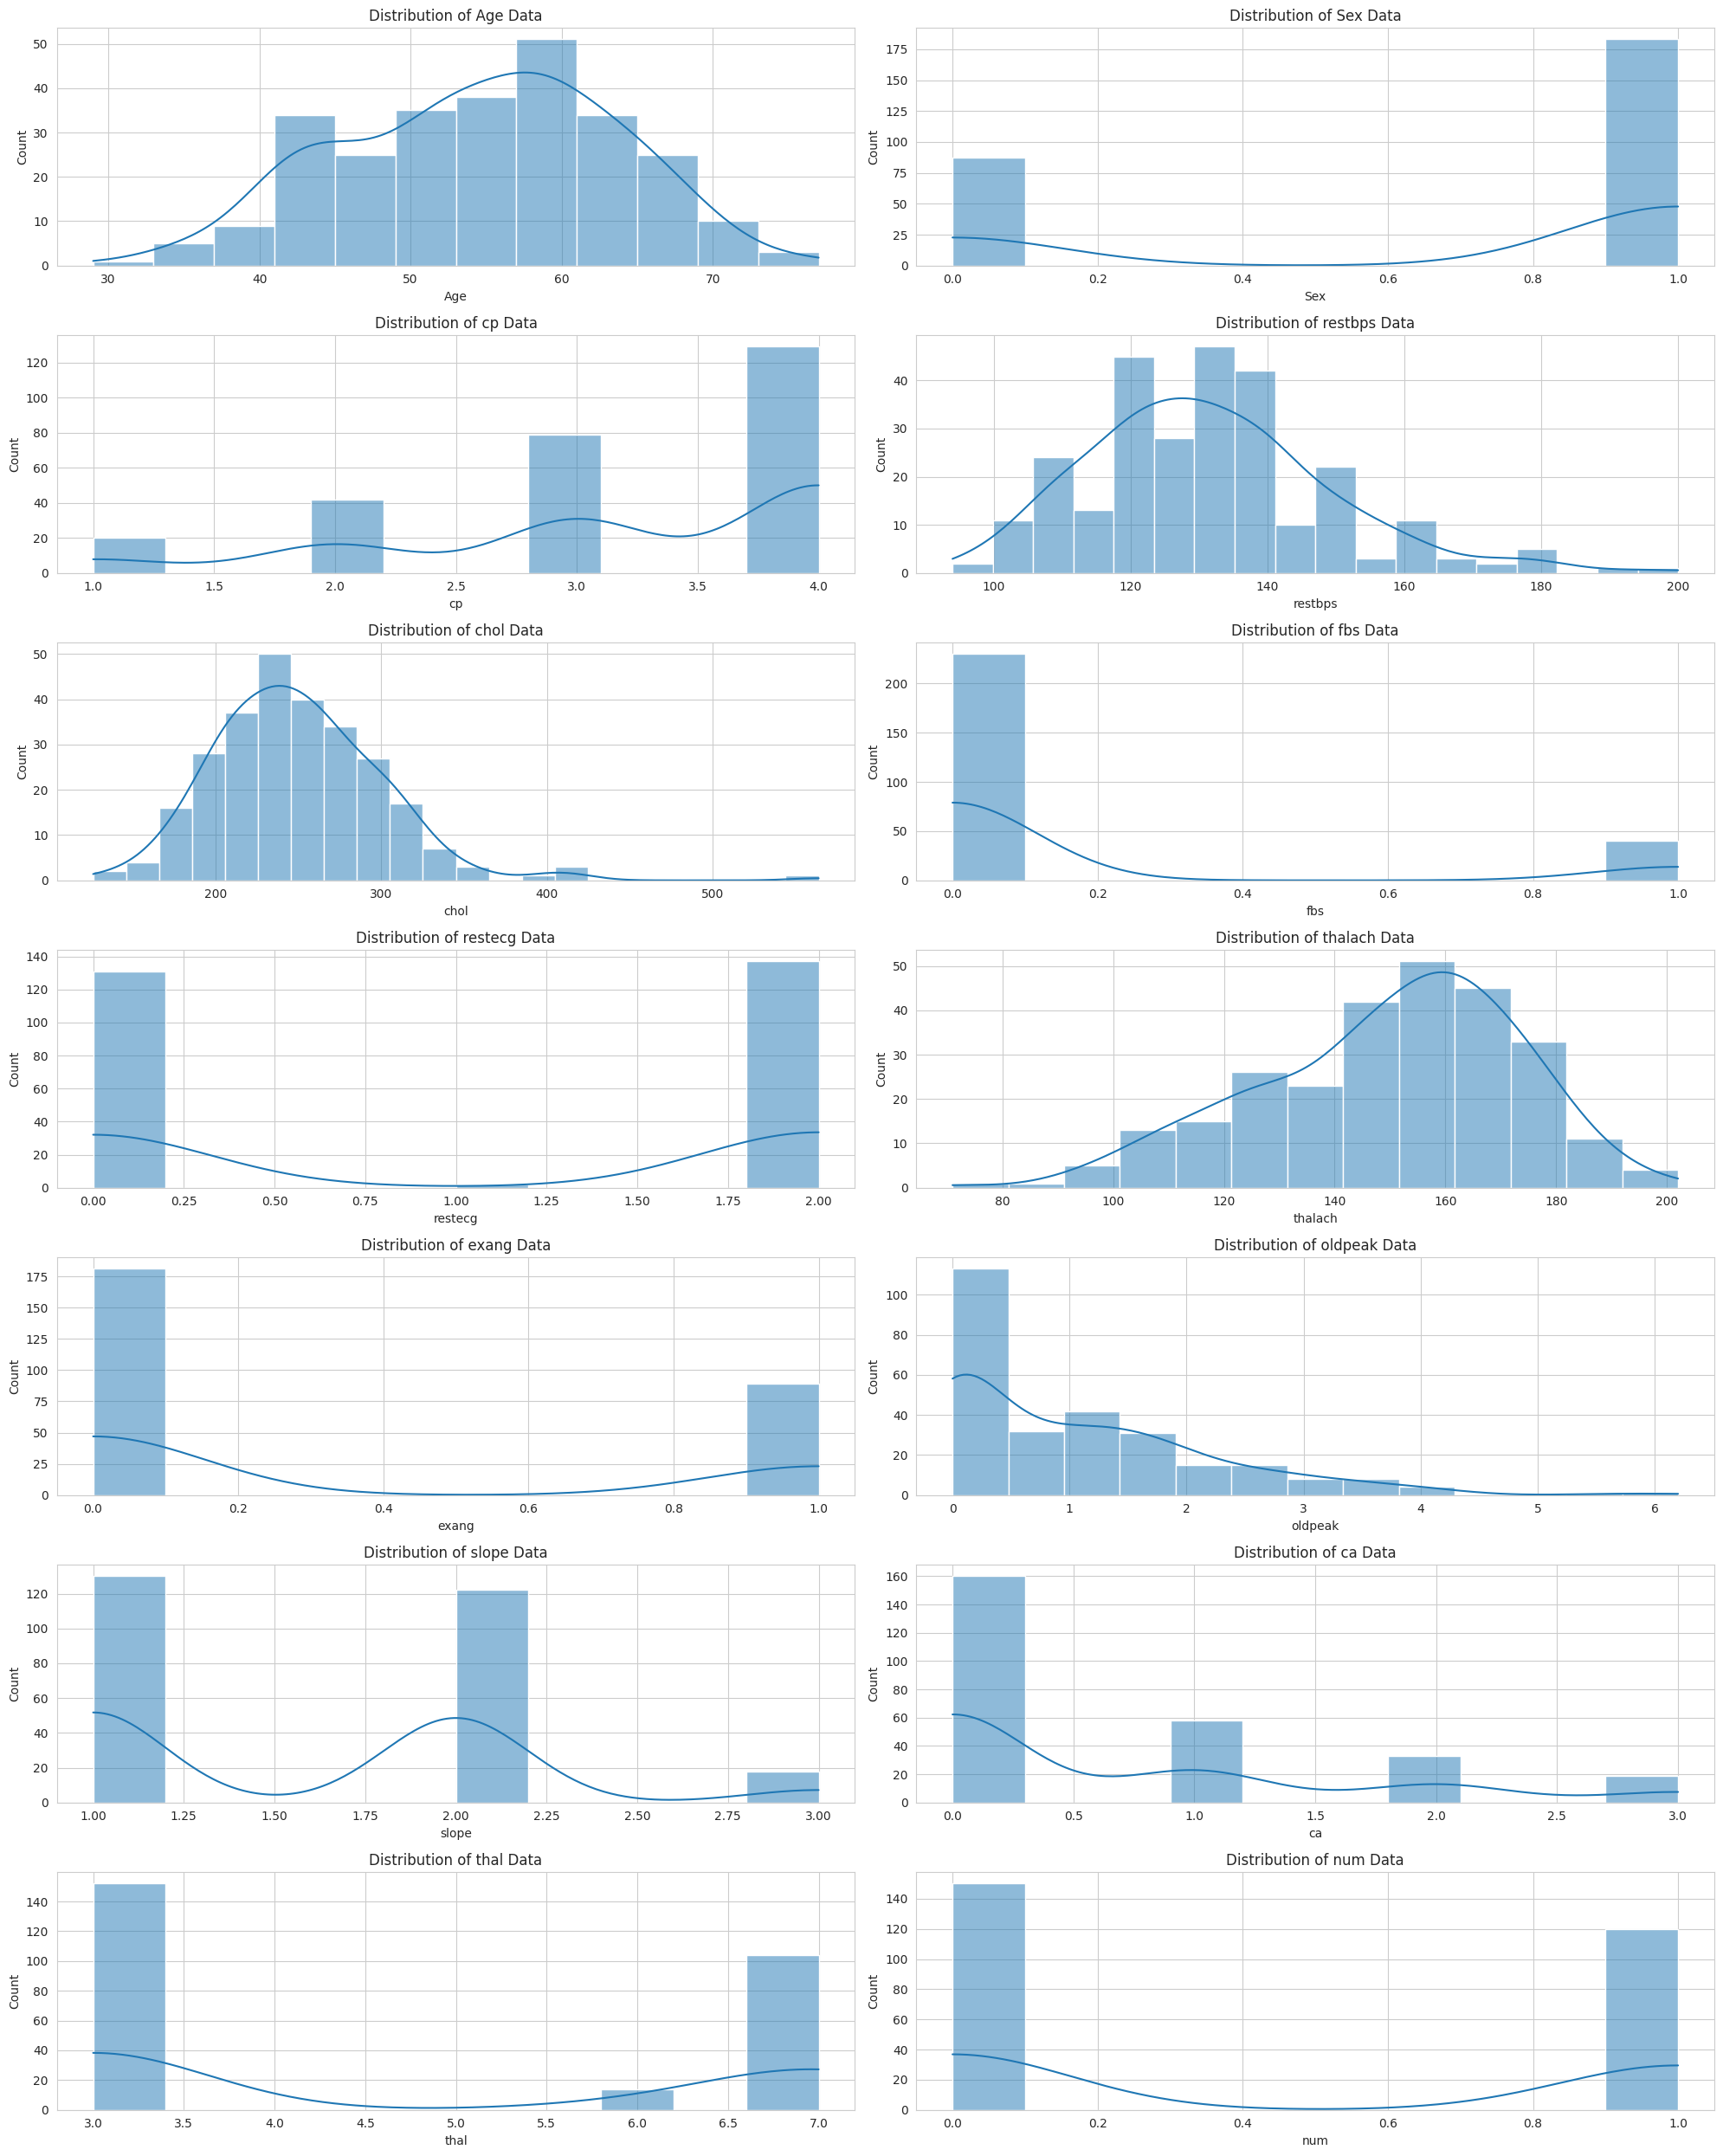

In [27]:
plt.figure(figsize=(20,25))
for i,col in enumerate(data.columns,1):
    plt.subplot(7,2,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(data[col],kde=True)
    plt.tight_layout()
    plt.plot()

Observations:



*   For each feature Scales are different, so we have to go for feature scaling.
*   Distributions are not normally distributed (i.e. Gaussian), StandardScaler shouldn't be used to scale the data. We'll use MinMaxScaler instead.







*   After visualizing the feature distributions, it's clear several numeric features are categorical (i.e. discrete)
*   ListCategorical Features: sex, cp, fbs, restecg, exng, slp, caa, thall, and output.
Continuous Features: age, restbps, chol, thalach, oldpeak.



<Axes: xlabel='num', ylabel='slope'>

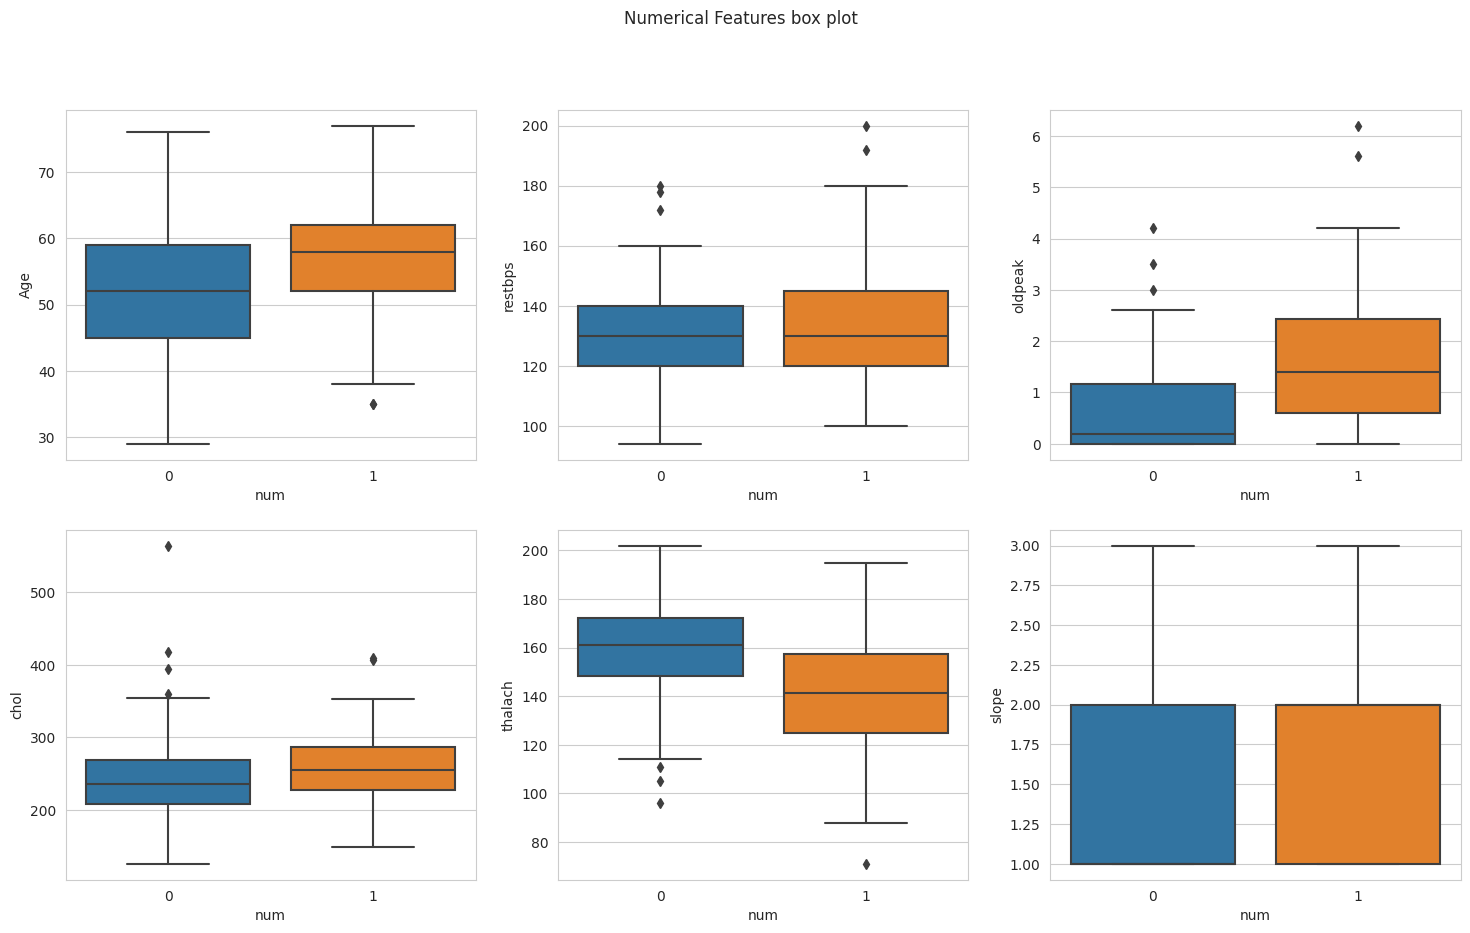

In [28]:

# Box plot the numerical features to check outliers
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Numerical Features box plot')

sns.boxplot(ax=axes[0, 0], data=data, x='num', y='Age')
sns.boxplot(ax=axes[0, 1], data=data, x='num', y='restbps')
sns.boxplot(ax=axes[0, 2], data=data, x='num', y='oldpeak')
sns.boxplot(ax=axes[1, 0], data=data, x='num', y='chol')
sns.boxplot(ax=axes[1, 1], data=data, x='num', y='thalach')
sns.boxplot(ax=axes[1, 2], data=data, x='num', y='slope')


**There are not many outliers to throw off our model's training.**

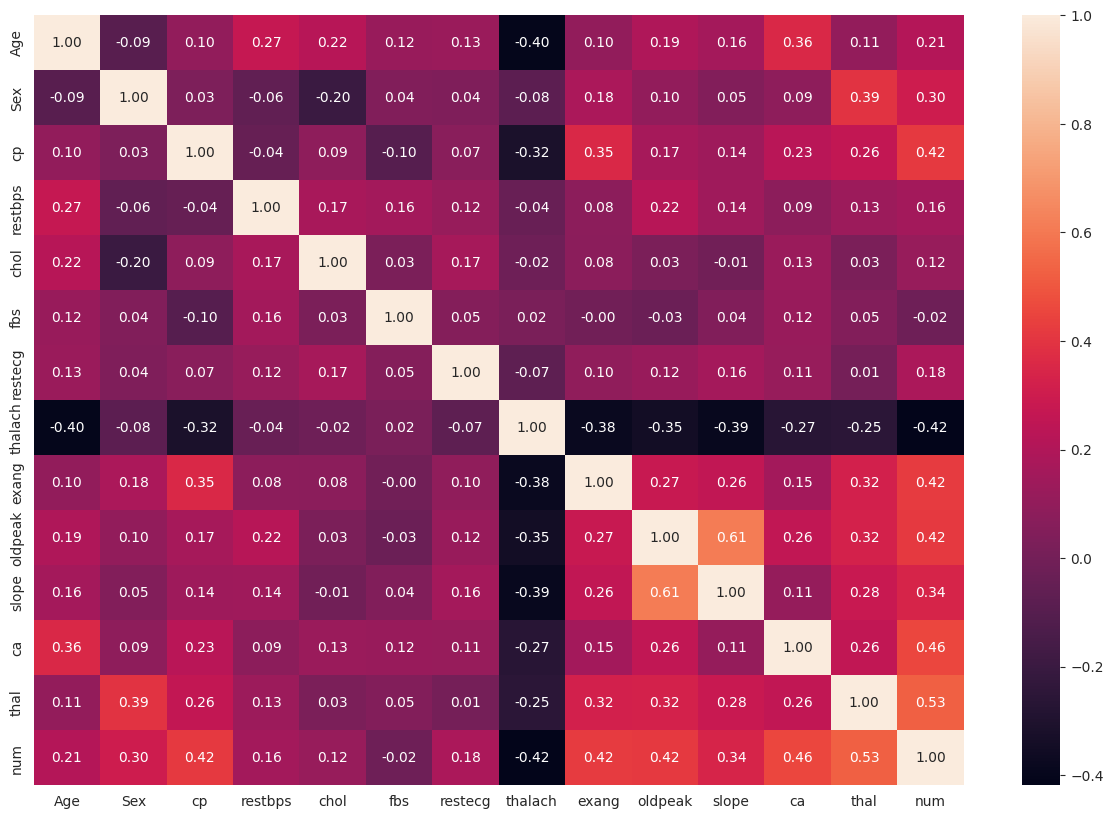

In [29]:
# Plot correlation matrix
corr_matrix = data.corr(numeric_only = True)
plt.figure(figsize=(15, 10))
ax = sns.heatmap(
    data = corr_matrix,
    annot = True,
    fmt = '.2f'
)

Slope of peak exersise and Oldpeak: ST depression induced by exercise relative to rest have the the best correlation

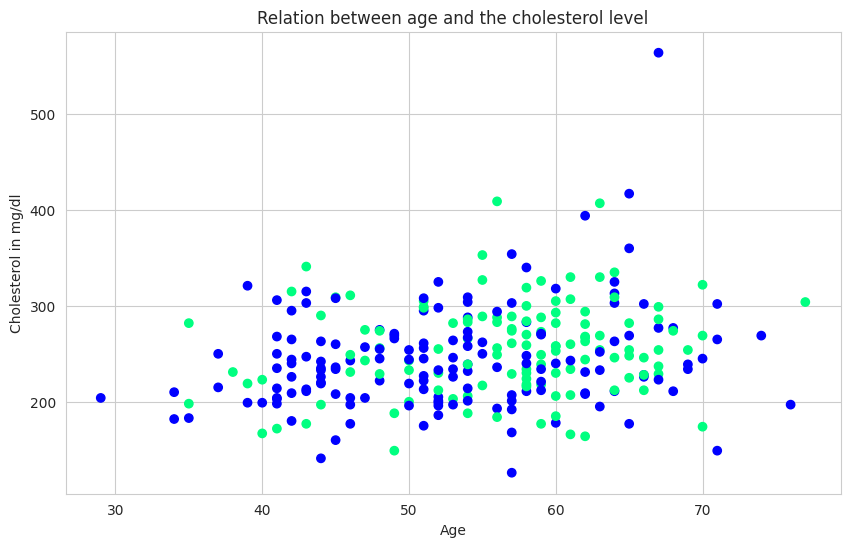

In [30]:
# Ploting scatter plot graph
plt.figure(figsize=(10, 6))
plt.title('Relation between age and the cholesterol level')
plt.scatter(df['Age'], df['chol'], c=df['num'], cmap='winter')
plt.xlabel('Age')
plt.ylabel('Cholesterol in mg/dl')
plt.show()

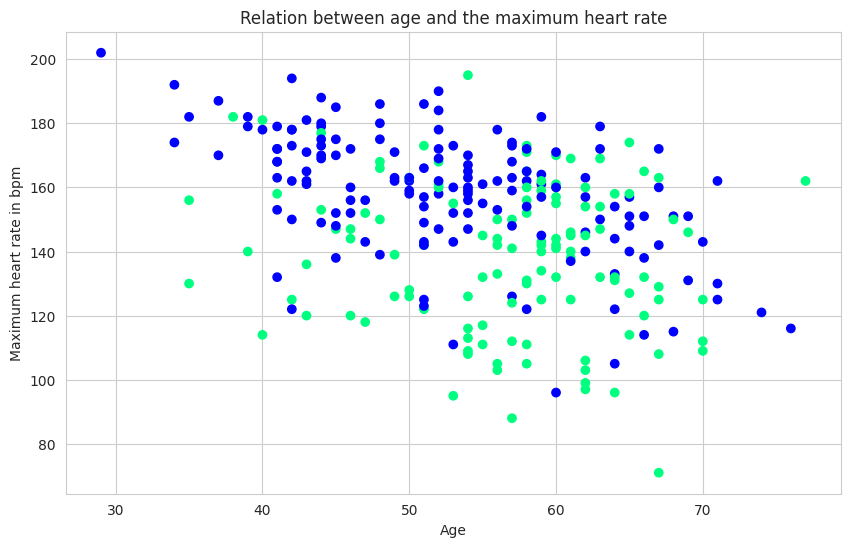

In [31]:
plt.figure(figsize=(10, 6))
plt.title('Relation between age and the maximum heart rate')
plt.scatter(df['Age'], df['thalach'], c=df['num'], cmap='winter')
plt.xlabel('Age')
plt.ylabel('Maximum heart rate in bpm')
plt.show()

In [32]:
# Visualize the number of men with heart disease
# plt.figure(figsize=(10,6))
print('Statistics of Men Diagnosed with Heart Disease:')
print('The Min age for men diagnosed with heart disease is: %s years'%data[(data['num']==1) & (data['Sex']==1)]['Age'].min())
print('The Max age for men diagnosed with heart disease is: %s years'%data[(data['num']==1) & (data['Sex']==1)]['Age'].max())
print('The Average age for men diagnosed with heart disease is: %s years'%data[(data['num']==1) & (data['Sex']==1)]['Age'].mean())
print('\n')

print('Statistics of Women Diagnosed with Heart Disease:')
print( 'The Min age for wonmen diagnosed with heart disease is: %s years'%data[(data['num']==1) & (data['Sex']==0)]['Age'].min())
print( 'The Max age for women diagnosed with heart disease is: %s years'%data[(data['num']==1) & (data['Sex']==0)]['Age'].max())
print( 'The Average age for women diagnosed with heart disease is: %s years'%data[(data['num']==1) & (data['Sex']==0)]['Age'].mean())
# .hist(alpha=0.5,color='blue',
#                                               bins=30,label='Credit.Policy=1')
# loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
#                                               bins=30,label='Credit.Policy=0')
# plt.legend()
# plt.xlabel('FICO')

Statistics of Men Diagnosed with Heart Disease:
The Min age for men diagnosed with heart disease is: 35.0 years
The Max age for men diagnosed with heart disease is: 77.0 years
The Average age for men diagnosed with heart disease is: 56.04 years


Statistics of Women Diagnosed with Heart Disease:
The Min age for wonmen diagnosed with heart disease is: 43.0 years
The Max age for women diagnosed with heart disease is: 66.0 years
The Average age for women diagnosed with heart disease is: 59.35 years


According to our data the difference in the minimum age for diagnosis between men and women in this dataset is **8** years. Whereas, the difference in the between the maximum age at which both men and women were first diagnosed is **11** years. Finally, the average age at which both men and women were first diagnosed only differed by **3.31** years, indicating that women are more likely to develop heart disease later in life than men. This data is consistent with a report by Harvard Health titled, " Heart attack and stroke: Men vs women",  where they reported that the average age for a first heart attack in women is 7 years earlier than in men.

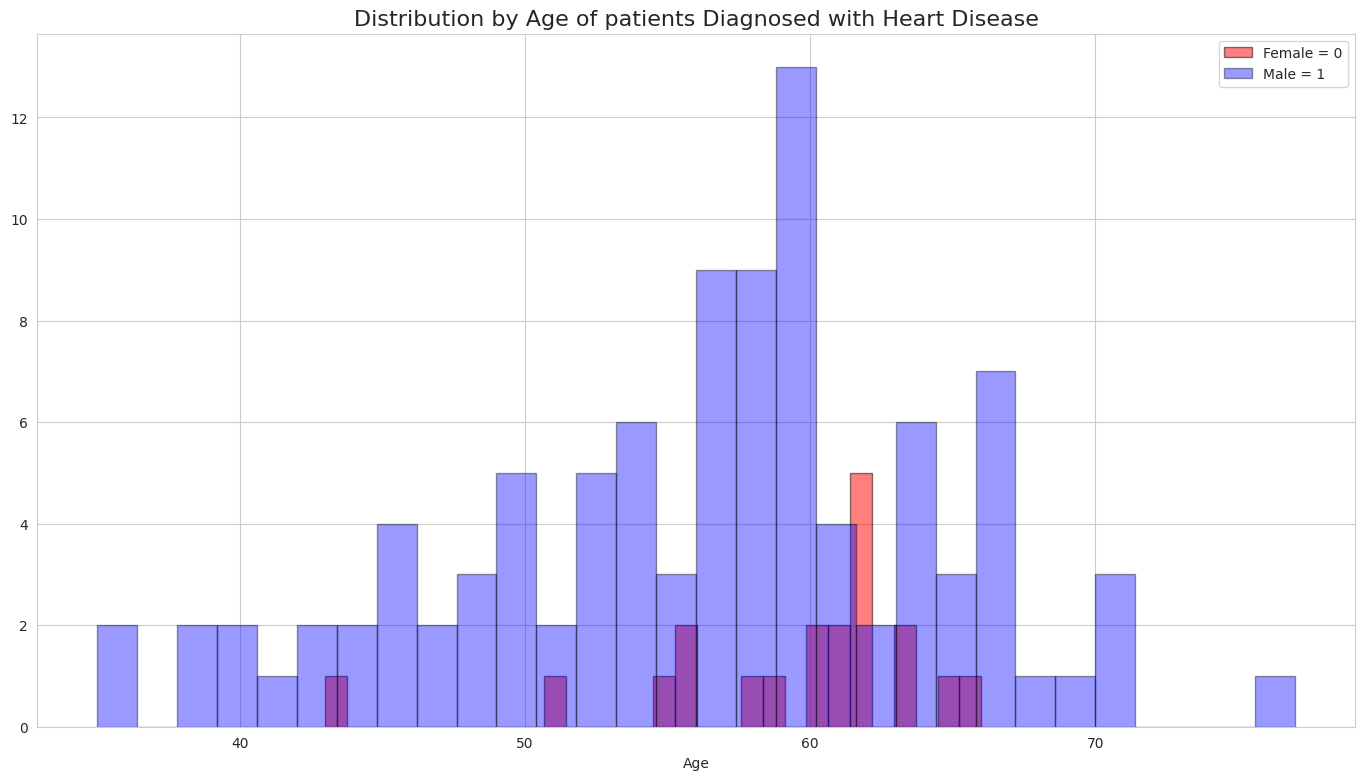

In [33]:
# Visualize the distribution by age between men and women diagnosed with Heart Disease
_= plt.figure(figsize=(17,9))
_= data[(data['Sex']==0)&(data['num']==1)]['Age'].hist(alpha=0.5,color='red',bins=30,edgecolor='k',label='Female = 0')

_= data[(data['Sex']==1)&(data['num']==1)]['Age'].hist(alpha=0.4,color='blue',bins=30,edgecolor='k',label='Male = 1')
_= plt.title('Distribution by Age of patients Diagnosed with Heart Disease',fontsize=16)
_= plt.legend()
_= plt.xlabel('Age')


In [34]:
# Export the clean prepared data to a csv file for further processing

data.to_csv('data_cleaned.csv')

### Conclusion:
Based on the intial exloration of the data it is evident that women are more likely to develop heart disease later than men.

As such age and gender is likely an attribute that will provide us with helpful insight as we continue to develop the classification algorithm.

Next we will spot check some classification algorithms to discover which is best suited for the problem at hand.

**Note:**

Because of the large number of features I will skip the attribute interaction plot part for this project since there are too many features, which can make it hard to interpret.